### WordCloud 的可选参数
* width（宽度）：画布的宽度（以像素为单位）。默认值是 400。
* height（高度）：画布的高度（以像素为单位）。默认值是 200。
* max_words（最大词数）：词云中包含的最大单词数。默认值是 200。
* min_font_size（最小字体大小）：词的最小字体大小。默认值是 4。
* max_font_size（最大字体大小）：词的最大字体大小。如果未设置，将自动计算。
* mode：默认为RGB模式，如果为RGBA模式且background_color为None，则背景透明
* background_color（背景颜色）：词云的背景颜色。默认是 'black'。常用选项包括 'white'、'lightblue' 等。
* colormap（颜色映射）：用于词语的颜色映射。可以是任何 matplotlib 的颜色映射名称，如 'viridis'、'plasma'、'inferno'、'magma' 等。
* mask（遮罩）：定义词云形状的数组。如果指定，这应该是一个 2D 的 numpy 数组，值为 0 的区域绘制单词，非零值区域将被忽略。
* contour_color（轮廓颜色）：绘制在单词周围的轮廓线的颜色。默认值为 None。
* contour_width（轮廓宽度）：绘制在单词周围的轮廓线的宽度。默认值是 0（无轮廓）。
* scale（缩放）：计算和绘制之间的缩放比例。较高的值会导致更清晰的图像。默认值是 1。
* relative_scaling（相对缩放）：确定词频如何影响其大小。默认值是 0.5。
* prefer_horizontal（倾向水平）：尝试水平适应而不是垂直适应的比例。默认值是 0.90。
* font_path（字体路径）：要使用的字体文件的路径。如果为 None，则使用默认字体。
* regexp（正则表达式）：用于将输入文本拆分为标记的正则表达式。默认值是 r"\w[\w']+"。
* collocations（搭配）：是否包括两个词的搭配（双字母组合）。默认值是 True。
* include_numbers（包含数字）：是否在词云中包含数字。默认值是 False。
* min_word_length（最小词长）：单词必须具有的最小字母数才能包含在内。默认值是 0。
* repeat（重复）：是否重复单词直到达到 max_words 或 min_font_size。默认值是 False。
* normalize_plurals（规范复数）：是否删除尾随 's' 以规范单词形式。默认值是 True。
* stopwords（停用词）：在词云中要忽略的词。可以添加或指定自己的停用词集合。

### 1.英文对象生成词云
由于英文文章本身就有空格，因此无需做额外处理

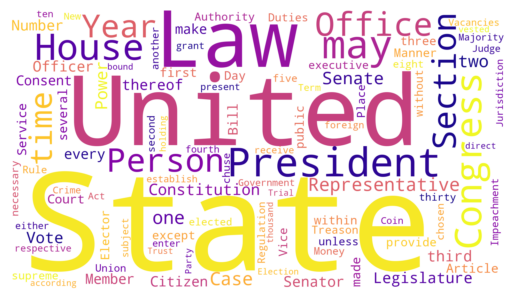

In [4]:
# -*- coding: utf-8 -*-
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 打开文本
text = open('constitution.txt').read()
# 生成对象
wc = WordCloud(
    width=1920,
    height=1080,
    max_words=100,
    background_color='white',
    colormap='plasma',
    contour_color='white',
    contour_width=1,
    prefer_horizontal=0.8,
    collocations=False,
    # font_path='path_to_chinese_font.ttf'  # 如果有中文字符，需要指定中文字体
).generate(text)

# 显示词云
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
'''
	plt.imshow(): 这是 Matplotlib 中用于显示图像的函数。它可以显示任意的图像数据，通常是二维的数组或由其他图像库生成的图像对象。
	•	参数 wc: 这是要显示的图像对象。在词云的例子中，wc 是一个由 WordCloud 库生成的词云图像。
	•	参数 interpolation='bilinear': 这个参数决定了图像缩放时的插值方式。bilinear 插值是一种平滑的插值方法，可以使图像在放大或缩小时看起来更加柔和和不失真。具体来说，bilinear 插值通过考虑附近四个像素的加权平均来计算新的像素值。
'''
# 保存到文件
wc.to_file('wordcloud.png')

### 2.中文对象直接生成词云（西游记）

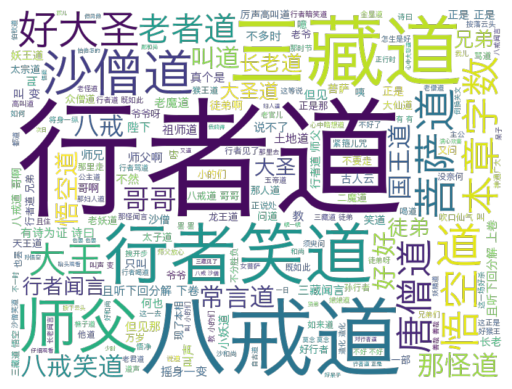

In [1]:
# -*- coding: utf-8 -*-
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 打开文本
text = open('xyj.txt', encoding='utf-8').read()
# 生成对象
wc = WordCloud(font_path='Hiragino.ttf', 
               width=800, 
               height=600, 
               mode='RGBA', 
               background_color=None # 背景透明
               ).generate(text)

# 显示词云
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # 关闭坐标轴
plt.show()

# 保存到文件
wc.to_file('wordcloud.png')

### 3.中文对象jieba分词后生成词云（西游记）加黑色蒙版

　   　   [   西游记       /       吴承恩   （   明   ）       著       ]   
   
   　   　   书籍   介绍   :   
   　 


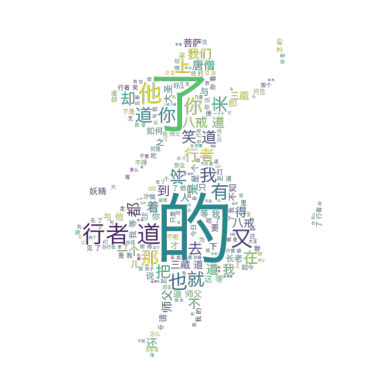

In [8]:
import jieba
from PIL import Image
import numpy as np
text = open('xyj.txt', encoding='utf-8').read()
text = ' '.join(jieba.cut(text))
print(text[:100])
# 加载黑色背景蒙版，蒙版要以数组方式储存，0的区域绘制，非零区域弃用
mask = np.array(Image.open("black_mask.png")) 
wc = WordCloud(
    mask=mask, 
    font_path='Hiragino.ttf', 
    mode='RGBA', 
    background_color=None
    ).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3-1 凭感觉去除了一些无语义介词、代词等 
剔除的不全面，不过好歹算能看了

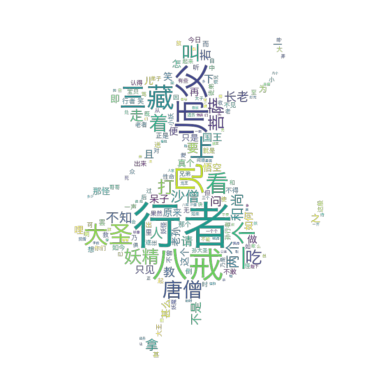

In [6]:
import jieba
from PIL import Image
import numpy as np
text = open('xyj.txt', encoding='utf-8').read()
text = ' '.join(jieba.cut(text))
mask = np.array(Image.open("black_mask.png")) # 加载黑色背景蒙版
wc = WordCloud(
    mask=mask, 
    font_path='Hiragino.ttf', 
    mode='RGBA', 
    background_color=None,
    stopwords = ['你', '我', '他', '了','的','吗','都','到','去','又','也','就','不','得','来','却','我们','与','是','怎么','有','等','说','道','把','才','只','好','那','还','将','个','在','这','这里','那里','这','被','此']
    ).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4.根据提供的图片（词云形状图片）原本的颜色给字重新上色
#### ImageColorGenerator(mask)
这是 WordCloud 库中的一个类，用于根据输入图像（通常称为掩码图像）生成颜色。掩码图像中的颜色信息将用于重新着色词云中的词汇。
* 参数 mask: 这是输入的图像对象，用作颜色模板。mask 通常是一个包含颜色信息的图片，词云将从这张图片中提取颜色并应用到生成的词上。
#### wc.recolor(color_func=image_colors)
这是 WordCloud 类中的方法，用于改变词云中词汇的颜色。通过指定color_func 参数，可以自定义词云中的颜色分布。
* 参数 color_func=image_colors: color_func 参数指定了一个颜色函数，用来决定词汇的颜色。这里使用 image_colors，意味着将使用由 ImageColorGenerator 基于 mask 提供的颜色方案来重新着色词云。

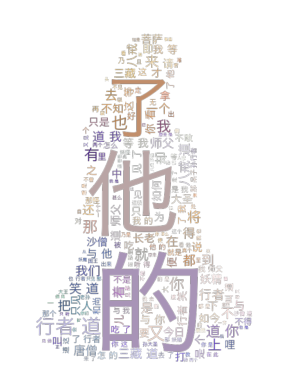

In [8]:
# -*- coding: utf-8 -*-
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import jieba
text = open('xyj.txt').read()
text = ' '.join(jieba.cut(text))
mask = np.array(Image.open("color_mask.png"))
wc = WordCloud(mask=mask, 
               font_path='Hiragino.ttf', 
               mode='RGBA', 
               background_color=None
               ).generate(text)

image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# 保存到文件
wc.to_file('wordcloud.png')

### 5.插入一个随机生成词颜色的函数控制单个词的颜色
* color_func方法需要的参数如下：
    * word: 当前正在着色的词。
    * font_size: 该词在词云中的字体大小。
    * position: 该词在词云图中的位置，通常是一个 (x, y) 坐标。
    * orientation: 该词的方向或角度。
    * font_path: 渲染该词所用字体的路径。
    * random_state: 随机状态，用于生成一致的随机值。
<h4 style="text-align:center;">色相对照表</h4>

<table>
    <thead>
        <tr>
            <th>颜色名称</th>
            <th>色相代码 (Hue)</th>
            <th>示例颜色</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>红色</td>
            <td>hsl(0, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(0, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>橙色</td>
            <td>hsl(30, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(30, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>黄色</td>
            <td>hsl(60, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(60, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>黄绿色</td>
            <td>hsl(90, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(90, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>绿色</td>
            <td>hsl(120, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(120, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>青绿色</td>
            <td>hsl(150, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(150, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>青色</td>
            <td>hsl(180, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(180, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>蓝绿色</td>
            <td>hsl(210, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(210, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>蓝色</td>
            <td>hsl(240, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(240, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>蓝紫色</td>
            <td>hsl(270, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(270, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>紫色</td>
            <td>hsl(300, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(300, 100%, 50%);"></span></td>
        </tr>
        <tr>
            <td>紫红色</td>
            <td>hsl(330, 100%, 50%)</td>
            <td><span class="color-box" style="background-color: hsl(330, 100%, 50%);"></span></td>
        </tr>
    </tbody>
</table>

hsl(0, 60%, 68%)
hsl(0, 69%, 61%)
hsl(0, 73%, 63%)
hsl(0, 77%, 76%)
hsl(0, 73%, 62%)
hsl(0, 65%, 71%)
hsl(0, 64%, 68%)
hsl(0, 61%, 60%)
hsl(0, 67%, 71%)
hsl(0, 62%, 61%)
hsl(0, 71%, 63%)
hsl(0, 60%, 69%)
hsl(0, 80%, 76%)
hsl(0, 67%, 72%)
hsl(0, 74%, 72%)
hsl(0, 63%, 69%)
hsl(0, 70%, 73%)
hsl(0, 65%, 61%)
hsl(0, 60%, 69%)
hsl(0, 72%, 70%)
hsl(0, 61%, 63%)
hsl(0, 70%, 63%)
hsl(0, 69%, 61%)
hsl(0, 66%, 68%)
hsl(0, 70%, 60%)
hsl(0, 64%, 76%)
hsl(0, 74%, 72%)
hsl(0, 65%, 72%)
hsl(0, 61%, 69%)
hsl(0, 72%, 72%)
hsl(0, 72%, 77%)
hsl(0, 77%, 65%)
hsl(0, 66%, 68%)
hsl(0, 66%, 75%)
hsl(0, 77%, 65%)
hsl(0, 61%, 75%)
hsl(0, 77%, 63%)
hsl(0, 79%, 61%)
hsl(0, 76%, 73%)
hsl(0, 78%, 60%)
hsl(0, 66%, 69%)
hsl(0, 78%, 79%)
hsl(0, 67%, 63%)
hsl(0, 61%, 64%)
hsl(0, 63%, 75%)
hsl(0, 75%, 65%)
hsl(0, 60%, 78%)
hsl(0, 65%, 78%)
hsl(0, 67%, 69%)
hsl(0, 62%, 78%)
hsl(0, 65%, 63%)
hsl(0, 79%, 62%)
hsl(0, 66%, 70%)
hsl(0, 78%, 77%)
hsl(0, 78%, 73%)
hsl(0, 76%, 71%)
hsl(0, 73%, 75%)
hsl(0, 73%, 75%)
hsl(0, 60%, 69

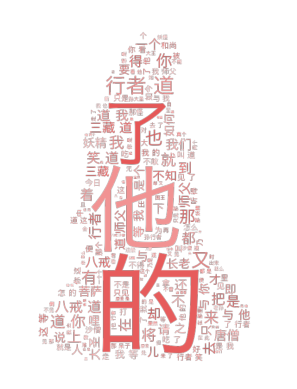

In [9]:
# -*- coding: utf-8 -*-
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import jieba
text = open('xyj.txt').read()
text = ' '.join(jieba.cut(text))
def random_color(word, font_size, position, orientation, font_path, random_state):
	s = 'hsl(0, %d%%, %d%%)' % (random.randint(60, 80), random.randint(60, 80))
	print(s)
	return s
'''
函数功能
	1.	生成颜色字符串：
		•	使用 hsl(0, %d%%, %d%%) 格式生成 HSL 颜色字符串。
		•	hsl 的三个参数分别是色相（Hue）、饱和度（Saturation）和亮度（Lightness）。
		•	色相值为 0，表示红色；饱和度和亮度在 60% 到 80% 之间随机选择。
	2.	输出颜色字符串：
		•	使用 print(s) 输出生成的颜色字符串到控制台，便于调试和查看。
	3.	返回颜色字符串：
		•	返回生成的 HSL 颜色字符串，用于在词云中为单词着色。
HSL 模型解释
	•	色相（Hue）：表示颜色类型，在这里固定为 0，即红色。
	•	饱和度（Saturation）：表示颜色的鲜艳程度，这里在 60% 到 80% 之间随机。
	•	亮度（Lightness）：表示颜色的明暗程度，这里也在 60% 到 80% 之间随机。
'''
mask = np.array(Image.open("color_mask.png"))
wc = WordCloud(color_func=random_color, 
			   mask=mask, 
			   font_path='Hiragino.ttf', 
			   mode='RGBA', 
			   background_color=None).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('wordcloud.png')

### 6.根据词的权重控制大小生成词云

[('行者', 0.13267208087376123), ('八戒', 0.060545784492521626), ('师父', 0.05548787651373802), ('三藏', 0.04881099376082701), ('大圣', 0.03393280864329511), ('唐僧', 0.03049170994138356), ('沙僧', 0.028239337327820406), ('菩萨', 0.027923172773813284), ('妖精', 0.025040478734388093), ('和尚', 0.02224147041243598), ('那怪', 0.020501777748003852), ('甚么', 0.02041031848558598), ('那里', 0.019449387366471244), ('长老', 0.018936486818456447), ('呆子', 0.017720452196271354), ('怎么', 0.016808465831007834), ('徒弟', 0.016589847268665824), ('不知', 0.01656892529856913), ('老孙', 0.015984555806169972), ('悟空', 0.015943237776945278)]


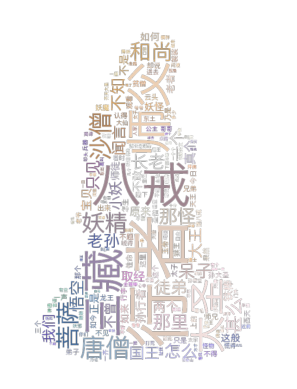

In [10]:
# -*- coding: utf-8 -*-
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import jieba.analyse

text = open('xyj.txt').read()

# 提取关键词和权重
freq = jieba.analyse.extract_tags(text, topK=200, withWeight=True)
'''
jieba.analyse.extract_tags()：这是 jieba 库中的方法，用于从给定的文本中提取关键词。
	•	参数 text：需要分析的文本数据。
	•	topK=200：提取前 200 个关键词，即按重要性排名前 200 的词。
	•	withWeight=True：如果为 True，则返回的关键词列表中每个关键词都会包含其权重，结果为一个列表，其中每个元素是一个二元组（关键词，权重）。
'''
print(freq[:20])
freq = {i[0]: i[1] for i in freq} # 将元组转换成字典{'word':freq(double)}

mask = np.array(Image.open("color_mask.png"))
wc = WordCloud(mask=mask, font_path='Hiragino.ttf', 
               mode='RGBA', 
               background_color=None).generate_from_frequencies(freq)
'''    
    generate_from_frequencies(freq)：从频率字典中生成词云，其中关键词的权重决定了其在词云中的大小。
    这个函数包含两个参数：一是frequencies字典，二是max_font_size，默认为None
    wordcloud.generate()实质上等价于 process_text() + generate_from_frequencies()
    process_text() 方法的主要作用是将输入的文本处理成一个词频字典。这是词云生成的基础步骤，文本会被分割为单词或短语，并计算每个词出现的次数。
'''
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('wordcloud.png')